# Proyecto 3 - Informatica Medica

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
data = pd.read_excel('../data/data.xlsx')

data

,Num caso,Aseguradora -Código-,Aseguradora -Descripción-,Edad,Grupo Edad,Sexo,Codigo de ciudad,Fecha de ingreso,Tipo de ingreso,Fecha de egreso,...,Proc28,Proc29,Proc30,Tipo servicio,Causa Basica de muerte,Infecciones,Infección Quirurgica,GRD -Código,GRD -Descripción,Tipo GRD
0,413799.0,204,Aseguradora_29,38,35-39,F,5001,30052005,URGENCIA,19062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,412359.0,313,Aseguradora_56,27,25-29,M,5088,11032005,URGENCIA,10042005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,412552.0,313,Aseguradora_56,39,35-39,M,5001,20032005,URGENCIA,10042005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,414131.0,227,Aseguradora_46,24,20-24,M,5001,20062005,URGENCIA,22062005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,410573.0,227,Aseguradora_46,60,60-64,M,5001,24112004,URGENCIA,7012005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,162762.0,233,Aseguradora_68,23,20-24,F,5088,29122005,URGENCIA,31122005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,162763.0,111,Aseguradora_37,64,60-64,M,5088,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,CIRUGÍA,NaN,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,162764.0,270,Aseguradora_22,8,5-9,f,5887,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,NO APLICA,NaN,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,162765.0,6,Aseguradora_57,21,20-24,M,5628,30122005,URGENCIA,31122005,...,NaN,NaN,NaN,URGENCIA ADULTOS,NaN,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


In [9]:
# columnas a minusculas, se quitan los espacios, los guiones y las tildes
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '_')
data.columns = data.columns.str.replace('-', '')
data.columns = data.columns.str.replace('ó', 'o')

In [10]:
data.columns

Index(['num_caso', 'aseguradora_codigo', 'aseguradora_descripcion', 'edad',
       'grupo_edad', 'sexo', 'codigo_de_ciudad', 'fecha_de_ingreso',
       'tipo_de_ingreso', 'fecha_de_egreso', 'días_estancia', 'servicioalta',
       'cuidados_intensivos', 'días_de_unidad_cuidado_intensivo',
       'dx_de_ingreso', 'dx_principal_de_egreso_', 'dx_principal_de_egreso_.1',
       'dx_ppal_3_caracteres', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'dxr_5',
       'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa',
       'causa_externa', 'situacion_al_alta', 'proc1', 'proc2', 'proc3',
       'proc4', 'proc5', 'proc6', 'proc7', 'proc8', 'proc9', 'proc10',
       'proc11', 'proc12', 'proc13', 'proc14', 'proc15', 'proc16', 'proc17',
       'proc18', 'proc19', 'proc20', 'proc21', 'proc22', 'proc23', 'proc24',
       'proc25', 'proc26', 'proc27', 'proc28', 'proc29', 'proc30',
       'tipo_servicio', 'causa_basica_de_muerte', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd

Propuesta de eliminación de columnas innecesarias
Identificadores/Metadatos irrelevantes para predicción

Num caso: Es un identificador único de cada registro. No aporta información predictiva y puede causar “data leakage” si el modelo lo utiliza como feauture.

Codigo de ciudad (y potencialmente Ciudad -Nombre- si existiera): A menos que exista una relación muy fuerte entre ciudad y GRD que queramos capturar, suelen actuar más como “ruido” dada su alta cardinalidad.

Columnas duplicadas o derivables

Aseguradora -Código- y Aseguradora -Descripción-: Mantén solo el código (o solo la descripción) según prefieras transformar la variable; la otra es redundante.

Fecha de ingreso y Fecha de egreso vs. Días estancia: Ya tienes Días estancia que es la derivación de ambas fechas; puedes eliminar las fechas para simplificar.

Descripción del GRD

GRD -Descripción y Tipo GRD: Son etiquetas de salida o información de interpretación. Para la predicción, basta GRD -Código. Ambas columnas deberían eliminarse del input.

Columnas con excesivo missing o irrelevancia clínica

Causa Basica de muerte tiene más de 90% de valores faltantes; a menos que planees imputar o que sea clave para algunos casos (ej. post-mortem), conviene descartarla.

Otras variables con cardinalidad muy alta o escaso aporte tras inspección clínica (p. ej. códigos de múltiples procedimientos) podrían agruparse o eliminarse si no aportan en tu análisis.

Eliminación inicial de columnas

In [11]:
# columnas a eliminar
delete_columns = ['num_caso', 'aseguradora_descripcion', 'aseguradora_codigo',
       'grupo_edad', 'fecha_de_ingreso',
       'fecha_de_egreso',
       'causa_externa',
       'causa_basica_de_muerte']

data.drop(delete_columns, axis=1, inplace=True)
data

,edad,sexo,codigo_de_ciudad,tipo_de_ingreso,días_estancia,servicioalta,cuidados_intensivos,días_de_unidad_cuidado_intensivo,dx_de_ingreso,dx_principal_de_egreso_,...,proc27,proc28,proc29,proc30,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo,grd_descripcion,tipo_grd
0,38,F,5001,URGENCIA,20,29,NO,0,2,I635,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,27,M,5088,URGENCIA,30,156,NO,0,2,B232,...,NaN,NaN,NaN,NaN,NO APLICA,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,39,M,5001,URGENCIA,21,39,NO,0,2,B227,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,24,M,5001,URGENCIA,2,20,NO,0,2,B208,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,60,M,5001,URGENCIA,44,24,NO,0,2,T814,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,5088,URGENCIA,2,297,NO,0,2,J018,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,64,M,5088,URGENCIA,1,42,SI,1,2,I743,...,NaN,NaN,NaN,NaN,CIRUGÍA,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,8,f,5887,URGENCIA,1,28,NO,0,2,S008,...,NaN,NaN,NaN,NaN,NO APLICA,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,21,M,5628,URGENCIA,1,24,NO,0,2,S681,...,NaN,NaN,NaN,NaN,URGENCIA ADULTOS,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


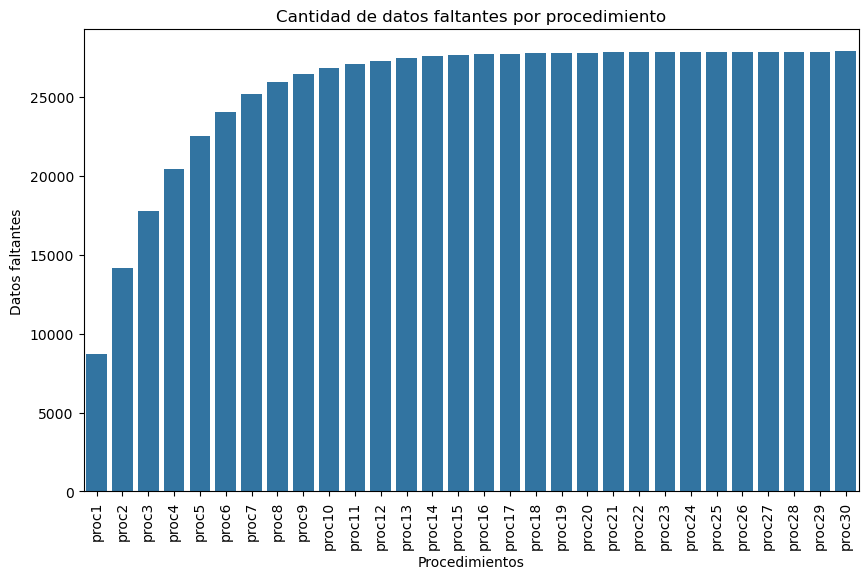

In [6]:
columns = ['proc1', 'proc2', 'proc3',
       'proc4', 'proc5', 'proc6', 'proc7', 'proc8', 'proc9', 'proc10',
       'proc11', 'proc12', 'proc13', 'proc14', 'proc15', 'proc16', 'proc17',
       'proc18', 'proc19', 'proc20', 'proc21', 'proc22', 'proc23', 'proc24',
       'proc25', 'proc26', 'proc27', 'proc28', 'proc29', 'proc30']

# datos faltantes
data_nan = data[columns].isnull().sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=data_nan.index, y=data_nan.values)
plt.xticks(rotation=90)
plt.title('Cantidad de datos faltantes por procedimiento')
plt.xlabel('Procedimientos')
plt.ylabel('Datos faltantes')
plt.show()

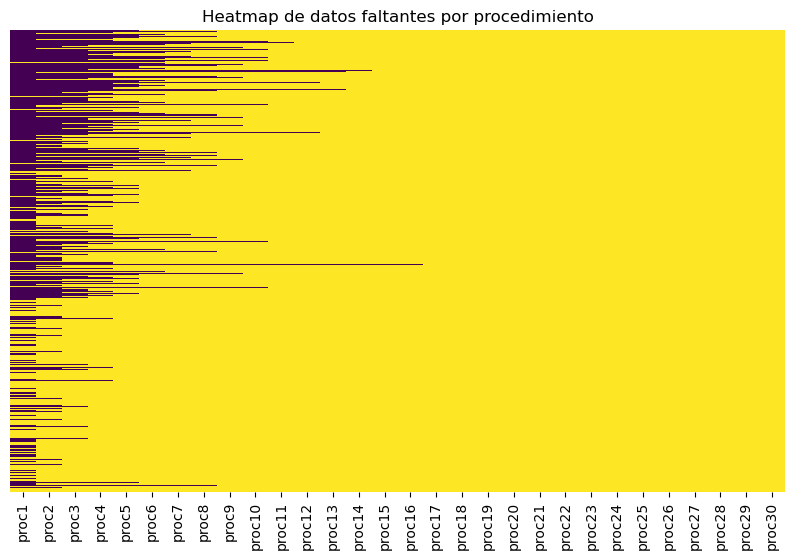

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(data[columns].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Heatmap de datos faltantes por procedimiento')
plt.show()

In [8]:
# columnas a eliminar
delete_columns = ['proc2', 'proc3',
       'proc4', 'proc5', 'proc6', 'proc7', 'proc8', 'proc9', 'proc10',
       'proc11', 'proc12', 'proc13', 'proc14', 'proc15', 'proc16', 'proc17',
       'proc18', 'proc19', 'proc20', 'proc21', 'proc22', 'proc23', 'proc24',
       'proc25', 'proc26', 'proc27', 'proc28', 'proc29', 'proc30']

data.drop(delete_columns, axis=1, inplace=True)
data

,edad,sexo,codigo_de_ciudad,tipo_de_ingreso,días_estancia,servicioalta,cuidados_intensivos,días_de_unidad_cuidado_intensivo,dx_de_ingreso,dx_principal_de_egreso_,...,dxr_10_,codigo_causa_externa,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo,grd_descripcion,tipo_grd
0,38,F,5001,URGENCIA,20,29,NO,0,2,I635,...,NaN,NaN,ALTA MEDICA,43.11,URGENCIA ADULTOS,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,27,M,5088,URGENCIA,30,156,NO,0,2,B232,...,NaN,NaN,ALTA MÉDICA,87.44,NO APLICA,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,39,M,5001,URGENCIA,21,39,NO,0,2,B227,...,NaN,NaN,ALTA MÉDICA,38.93,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,24,M,5001,URGENCIA,2,20,NO,0,2,B208,...,NaN,NaN,ALTA MÉDICA,88.01,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,60,M,5001,URGENCIA,44,24,NO,0,2,T814,...,NaN,Y838,ALTA MÉDICA,45.16,URGENCIA ADULTOS,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,5088,URGENCIA,2,297,NO,0,2,J018,...,NaN,NaN,ALTA MÉDICA,NaN,URGENCIA ADULTOS,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,64,M,5088,URGENCIA,1,42,SI,1,2,I743,...,NaN,NaN,FALLECIDO,38.08,CIRUGÍA,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,8,f,5887,URGENCIA,1,28,NO,0,2,S008,...,NaN,V800,ALTA MÉDICA,21.82,NO APLICA,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,21,M,5628,URGENCIA,1,24,NO,0,2,S681,...,NaN,X998,ALTA MEDICA,77.04,URGENCIA ADULTOS,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


In [9]:
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_de_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos',
       'días_de_unidad_cuidado_intensivo', 'dx_de_ingreso',
       'dx_principal_de_egreso_', 'dx_principal_de_egreso_.1',
       'dx_ppal_3_caracteres', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'dxr_5',
       'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27869 entries, 0 to 27868
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   edad                              27869 non-null  int64  
 1   sexo                              27869 non-null  object 
 2   codigo_de_ciudad                  27869 non-null  int64  
 3   tipo_de_ingreso                   27869 non-null  object 
 4   días_estancia                     27869 non-null  int64  
 5   servicioalta                      27869 non-null  int64  
 6   cuidados_intensivos               27869 non-null  object 
 7   días_de_unidad_cuidado_intensivo  27869 non-null  int64  
 8   dx_de_ingreso                     27869 non-null  int64  
 9   dx_principal_de_egreso_           27869 non-null  object 
 10  dx_principal_de_egreso_.1         27869 non-null  object 
 11  dx_ppal_3_caracteres              27869 non-null  object 
 12  dxr_

In [11]:
data.rename(columns={
    'dx_principal_de_egreso_.1': 'dx_principal_egreso',
    'días_de_unidad_cuidado_intensivo': 'dias_uci',
    'tipo_de_ingreso': 'tipo_ingreso'
}, inplace=True)

In [12]:
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_de_egreso_', 'dx_principal_egreso',
       'dx_ppal_3_caracteres', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'dxr_5',
       'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [13]:
delete_columns = ['dxr_5', 'dxr6', 'dxr_7', 'dxr_8', 'dxr_9', 'dxr_10_', 'codigo_causa_externa']

data.drop(delete_columns, axis=1, inplace=True)
data

,edad,sexo,codigo_de_ciudad,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_de_egreso_,...,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo,grd_descripcion,tipo_grd
0,38,F,5001,URGENCIA,20,29,NO,0,2,I635,...,C787,C788,ALTA MEDICA,43.11,URGENCIA ADULTOS,NO,NO,14143,MH ACCIDENTE VASCULAR CEREBRAL CON INFARTO w/MCC,M
1,27,M,5088,URGENCIA,30,156,NO,0,2,B232,...,B162,A530,ALTA MÉDICA,87.44,NO APLICA,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
2,39,M,5001,URGENCIA,21,39,NO,0,2,B227,...,B588,D70,ALTA MÉDICA,38.93,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
3,24,M,5001,URGENCIA,2,20,NO,0,2,B208,...,A600,N518,ALTA MÉDICA,88.01,URGENCIA ADULTOS,NO,NO,184153,MH INFECCIÓN POR VIRUS DE INMUNODEFICIENCIA HU...,M
4,60,M,5001,URGENCIA,44,24,NO,0,2,T814,...,N390,B961,ALTA MÉDICA,45.16,URGENCIA ADULTOS,NO,NO,184112,MH INFECCIONES POST OPERATORIAS Y POSTRAUMÁTIC...,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,5088,URGENCIA,2,297,NO,0,2,J018,...,NaN,NaN,ALTA MÉDICA,NaN,URGENCIA ADULTOS,NO,NO,34131,"MH EPIGLOTITIS, OTITIS MEDIA, INFECCIONES DEL ...",M
27865,64,M,5088,URGENCIA,1,42,SI,1,2,I743,...,R100,NaN,FALLECIDO,38.08,CIRUGÍA,NO,NO,61203,PH PROCEDIMIENTOS COMPLEJOS INTESTINALES w/MCC,Q
27866,8,f,5887,URGENCIA,1,28,NO,0,2,S008,...,S0250,NaN,ALTA MÉDICA,21.82,NO APLICA,NO,NO,31202,"PH OTROS PROCEDIMIENTOS DE OÍDOS, NARIZ, BOCA ...",Q
27867,21,M,5628,URGENCIA,1,24,NO,0,2,S681,...,S6270,S661,ALTA MEDICA,77.04,URGENCIA ADULTOS,NO,NO,91301,PH INJERTO DE PIEL SIN QUEMADURAS,Q


In [14]:
columns_dx = ['dx_principal_de_egreso_', 'dx_ppal_3_caracteres']

data.drop(columns_dx, axis=1, inplace=True)
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [15]:
data.cuidados_intensivos.value_counts()

cuidados_intensivos
NO    26681
SI     1182
no        3
Si        1
No        1
si        1
Name: count, dtype: int64

In [16]:
# se juntan los pacientes una misma distinción de sexo correspondiente
data.sexo.replace({'f': 'F'}, inplace=True)
data.sexo.replace({'m': 'M'}, inplace=True)
# similarmente se juntan los pacientes en un mismo tipo de ingreso correspondiente
data.tipo_ingreso.replace({'urgencias': 'URGENCIA'}, inplace=True)
data.tipo_ingreso.replace({'Urgencias': 'URGENCIA'}, inplace=True)
data.tipo_ingreso.replace({'Programado': 'PROGRAMADO'}, inplace=True)
# cuidados intensivos
data.cuidados_intensivos.replace({'si': 'SI'}, inplace=True)
data.cuidados_intensivos.replace({'no': 'NO'}, inplace=True)
data.cuidados_intensivos.replace({'Si': 'SI'}, inplace=True)
data.cuidados_intensivos.replace({'No': 'NO'}, inplace=True)

In [17]:
data.cuidados_intensivos.value_counts()

cuidados_intensivos
NO    26685
SI     1184
Name: count, dtype: int64

In [18]:
data.columns

Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo', 'grd_descripcion', 'tipo_grd'],
      dtype='object')

In [19]:
columns = ['grd_descripcion', 'tipo_grd']

data.drop(columns, axis=1, inplace=True)
data.columns


Index(['edad', 'sexo', 'codigo_de_ciudad', 'tipo_ingreso', 'días_estancia',
       'servicioalta', 'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo'],
      dtype='object')

In [20]:
data.infeccion_quirurgica.value_counts()

infeccion_quirurgica
NO    27663
SI      204
Si        1
si        1
Name: count, dtype: int64

In [21]:
data.infecciones.replace({'si': 'SI'}, inplace=True)
data.infecciones.replace({'no': 'NO'}, inplace=True)

data.infeccion_quirurgica.replace({'si': 'SI'}, inplace=True)
data.infeccion_quirurgica.replace({'Si': 'SI'}, inplace=True)


In [22]:
data.situacion_al_alta.value_counts()

situacion_al_alta
ALTA MÉDICA    26366
FALLECIDO       1492
ALTA MEDICA        7
Muerto             1
Fallecido          1
fallecido          1
Name: count, dtype: int64

In [23]:
data.situacion_al_alta.replace({'ALTA MEDICA': 'ALTA MÉDICA'}, inplace=True)
data.situacion_al_alta.replace({'Fallecido': 'FALLECIDO'}, inplace=True)
data.situacion_al_alta.replace({'fallecido': 'FALLECIDO'}, inplace=True)
data.situacion_al_alta.replace({'Muerto': 'FALLECIDO'}, inplace=True)

data.situacion_al_alta.value_counts()

situacion_al_alta
ALTA MÉDICA    26373
FALLECIDO       1495
Name: count, dtype: int64

In [24]:
data.drop(columns=['codigo_de_ciudad'], inplace=True)
data.columns

Index(['edad', 'sexo', 'tipo_ingreso', 'días_estancia', 'servicioalta',
       'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'tipo_servicio', 'infecciones',
       'infeccion_quirurgica', 'grd_codigo'],
      dtype='object')

In [25]:
data.edad.value_counts()

edad
81     592
77     586
68     555
76     551
75     540
      ... 
106      2
102      2
105      1
109      1
104      1
Name: count, Length: 108, dtype: int64

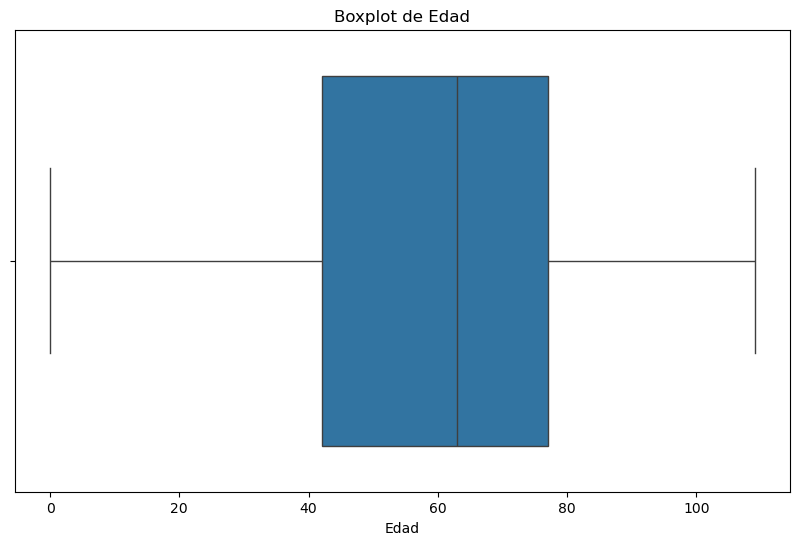

In [26]:
# boxplot de edad
plt.figure(figsize=(10, 6))
sns.boxplot(x=data.edad)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

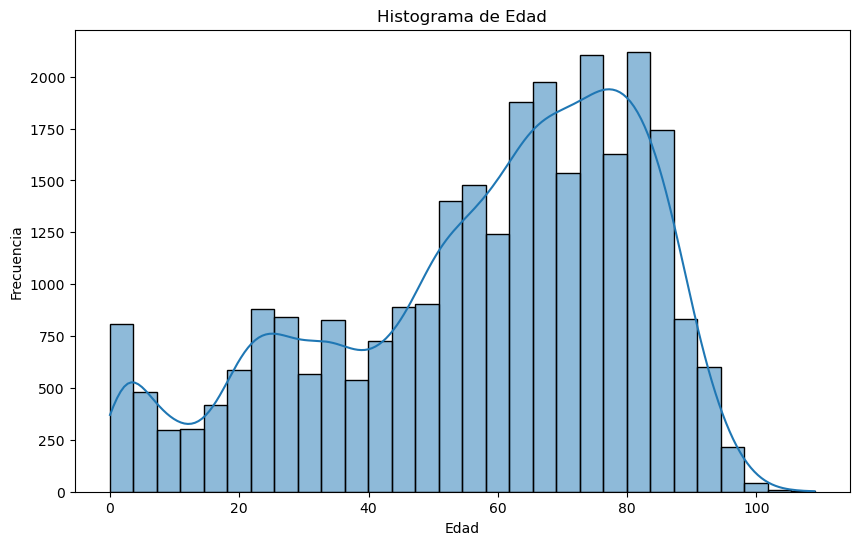

In [27]:
# histograma de edad
plt.figure(figsize=(10, 6))
sns.histplot(data.edad, bins=30, kde=True)
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Preprocesamiento y codificación

In [28]:
data_process = data.copy()
data_process

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,F,URGENCIA,20,29,NO,0,2,I63,I652,C189,C787,C788,ALTA MÉDICA,43.11,URGENCIA ADULTOS,NO,NO,14143
1,27,M,URGENCIA,30,156,NO,0,2,B23,B210,B204,B162,A530,ALTA MÉDICA,87.44,NO APLICA,NO,NO,184153
2,39,M,URGENCIA,21,39,NO,0,2,B22,B451,G052,B588,D70,ALTA MÉDICA,38.93,URGENCIA ADULTOS,NO,NO,184153
3,24,M,URGENCIA,2,20,NO,0,2,B20,B200,B210,A600,N518,ALTA MÉDICA,88.01,URGENCIA ADULTOS,NO,NO,184153
4,60,M,URGENCIA,44,24,NO,0,2,T81,Y838,C140,N390,B961,ALTA MÉDICA,45.16,URGENCIA ADULTOS,NO,NO,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,F,URGENCIA,2,297,NO,0,2,J01,R509,NaN,NaN,NaN,ALTA MÉDICA,NaN,URGENCIA ADULTOS,NO,NO,34131
27865,64,M,URGENCIA,1,42,SI,1,2,I74,K658,K261,R100,NaN,FALLECIDO,38.08,CIRUGÍA,NO,NO,61203
27866,8,F,URGENCIA,1,28,NO,0,2,S00,V8009,S0240,S0250,NaN,ALTA MÉDICA,21.82,NO APLICA,NO,NO,31202
27867,21,M,URGENCIA,1,24,NO,0,2,S68,X9988,S6260,S6270,S661,ALTA MÉDICA,77.04,URGENCIA ADULTOS,NO,NO,91301


Se hace codificación binaria en las variables categoricas con dos clases

In [29]:
data.tipo_ingreso.value_counts()

tipo_ingreso
URGENCIA      25574
PROGRAMADO     2295
Name: count, dtype: int64

In [30]:
# codificacion binaria
data_process['sexo'] = data_process['sexo'].map({'F': 0, 'M': 1})
data_process['tipo_ingreso'] = data_process['tipo_ingreso'].map({'URGENCIA': 0, 'PROGRAMADO': 1})
data_process['cuidados_intensivos'] = data_process['cuidados_intensivos'].map({'SI': 1, 'NO': 0})
data_process['infeccion_quirurgica'] = data_process['infeccion_quirurgica'].map({'SI': 1, 'NO': 0})
data_process['infecciones'] = data_process['infecciones'].map({'SI': 1, 'NO': 0})
data_process['situacion_al_alta'] = data_process['situacion_al_alta'].map({'ALTA MÉDICA': 1, 'FALLECIDO': 0})

data_process

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,0,0,20,29,0,0,2,I63,I652,C189,C787,C788,1.0,43.11,URGENCIA ADULTOS,0,0,14143
1,27,1,0,30,156,0,0,2,B23,B210,B204,B162,A530,1.0,87.44,NO APLICA,0,0,184153
2,39,1,0,21,39,0,0,2,B22,B451,G052,B588,D70,1.0,38.93,URGENCIA ADULTOS,0,0,184153
3,24,1,0,2,20,0,0,2,B20,B200,B210,A600,N518,1.0,88.01,URGENCIA ADULTOS,0,0,184153
4,60,1,0,44,24,0,0,2,T81,Y838,C140,N390,B961,1.0,45.16,URGENCIA ADULTOS,0,0,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,0,0,2,297,0,0,2,J01,R509,NaN,NaN,NaN,1.0,NaN,URGENCIA ADULTOS,0,0,34131
27865,64,1,0,1,42,1,1,2,I74,K658,K261,R100,NaN,0.0,38.08,CIRUGÍA,0,0,61203
27866,8,0,0,1,28,0,0,2,S00,V8009,S0240,S0250,NaN,1.0,21.82,NO APLICA,0,0,31202
27867,21,1,0,1,24,0,0,2,S68,X9988,S6260,S6270,S661,1.0,77.04,URGENCIA ADULTOS,0,0,91301


In [31]:
data_process.tipo_servicio.value_counts()

tipo_servicio
URGENCIA ADULTOS        24836
NO APLICA                2348
URGENCIA PEDÍATRICAS      367
CIRUGÍA                   308
U. ADULTOS                  1
URGENCIA ADULTO             1
URGENCIA ADULTOS.           1
URGENCIA - ADULTOS          1
No aplica                   1
N0 APLICA                   1
CIRUGIA                     1
URGENCIA PEDIATRICAS        1
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64

In [32]:
data_process.tipo_servicio.unique()

array(['URGENCIA ADULTOS', 'NO APLICA', 'CIRUGÍA', 'URGENCIA PEDÍATRICAS',
       'U. ADULTOS', 'URGENCIA ADULTO', 'URGENCIA ADULTOS.',
       'URGENCIA - ADULTOS', nan, 'No aplica', 'N0 APLICA', 'CIRUGIA',
       'URGENCIA PEDIATRICAS', 'ATENCIÓN PRIORITARIA'], dtype=object)

In [33]:
data_process.tipo_servicio.replace({'U. ADULTOS': 'URGENCIA ADULTOS'}, inplace=True)
data_process.tipo_servicio.replace({'URGENCIA ADULTO': 'URGENCIA ADULTOS'}, inplace=True)
data_process.tipo_servicio.replace({'URGENCIA ADULTOS.': 'URGENCIA ADULTOS'}, inplace=True)
data_process.tipo_servicio.replace({'URGENCIA - ADULTOS': 'URGENCIA ADULTOS'}, inplace=True)

data_process.tipo_servicio.replace({'URGENCIA PEDÍATRICAS': 'URGENCIA PEDIATRICAS'}, inplace=True)
data_process.tipo_servicio.replace({'CIRUGÍA': 'CIRUGIA'}, inplace=True)

data_process.tipo_servicio.replace({'No aplica': 'NO APLICA'}, inplace=True)
data_process.tipo_servicio.replace({'N0 APLICA': 'NO APLICA'}, inplace=True)

data_process.tipo_servicio.value_counts()



tipo_servicio
URGENCIA ADULTOS        24840
NO APLICA                2350
URGENCIA PEDIATRICAS      368
CIRUGIA                   309
ATENCIÓN PRIORITARIA        1
Name: count, dtype: int64

In [36]:
# elimina la fila con tipo de servicio 'ATENCION PRIORITARIA'
data_process = data_process[data_process.tipo_servicio != 'ATENCIÓN PRIORITARIA']
data_process.tipo_servicio.value_counts()


tipo_servicio
URGENCIA ADULTOS        24840
NO APLICA                2350
URGENCIA PEDIATRICAS      368
CIRUGIA                   309
Name: count, dtype: int64

In [37]:
data_process

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,0,0,20,29,0,0,2,I63,I652,C189,C787,C788,1.0,43.11,URGENCIA ADULTOS,0,0,14143
1,27,1,0,30,156,0,0,2,B23,B210,B204,B162,A530,1.0,87.44,NO APLICA,0,0,184153
2,39,1,0,21,39,0,0,2,B22,B451,G052,B588,D70,1.0,38.93,URGENCIA ADULTOS,0,0,184153
3,24,1,0,2,20,0,0,2,B20,B200,B210,A600,N518,1.0,88.01,URGENCIA ADULTOS,0,0,184153
4,60,1,0,44,24,0,0,2,T81,Y838,C140,N390,B961,1.0,45.16,URGENCIA ADULTOS,0,0,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27864,23,0,0,2,297,0,0,2,J01,R509,NaN,NaN,NaN,1.0,NaN,URGENCIA ADULTOS,0,0,34131
27865,64,1,0,1,42,1,1,2,I74,K658,K261,R100,NaN,0.0,38.08,CIRUGIA,0,0,61203
27866,8,0,0,1,28,0,0,2,S00,V8009,S0240,S0250,NaN,1.0,21.82,NO APLICA,0,0,31202
27867,21,1,0,1,24,0,0,2,S68,X9988,S6260,S6270,S661,1.0,77.04,URGENCIA ADULTOS,0,0,91301


In [62]:
# save the processed data
data_process.to_csv('data_process.csv', index=False)


In [38]:
data = pd.read_csv('data_process.csv')
data

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,dxr_2,dxr_3,dxr_4,situacion_al_alta,proc1,tipo_servicio,infecciones,infeccion_quirurgica,grd_codigo
0,38,0,0,20,29,0,0,2,I63,I652,C189,C787,C788,1.0,43.11,URGENCIA ADULTOS,0,0,14143
1,27,1,0,30,156,0,0,2,B23,B210,B204,B162,A530,1.0,87.44,NO APLICA,0,0,184153
2,39,1,0,21,39,0,0,2,B22,B451,G052,B588,D70,1.0,38.93,URGENCIA ADULTOS,0,0,184153
3,24,1,0,2,20,0,0,2,B20,B200,B210,A600,N518,1.0,88.01,URGENCIA ADULTOS,0,0,184153
4,60,1,0,44,24,0,0,2,T81,Y838,C140,N390,B961,1.0,45.16,URGENCIA ADULTOS,0,0,184112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,23,0,0,2,297,0,0,2,J01,R509,NaN,NaN,NaN,1.0,NaN,URGENCIA ADULTOS,0,0,34131
27864,64,1,0,1,42,1,1,2,I74,K658,K261,R100,NaN,0.0,38.08,CIRUGIA,0,0,61203
27865,8,0,0,1,28,0,0,2,S00,V8009,S0240,S0250,NaN,1.0,21.82,NO APLICA,0,0,31202
27866,21,1,0,1,24,0,0,2,S68,X9988,S6260,S6270,S661,1.0,77.04,URGENCIA ADULTOS,0,0,91301


In [39]:
# one hot en tipo_servicio
data = pd.get_dummies(data, columns=['tipo_servicio'], drop_first=True, dtype=int)
data

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,23,0,0,2,297,0,0,2,J01,R509,...,NaN,NaN,1.0,NaN,0,0,34131,0,1,0
27864,64,1,0,1,42,1,1,2,I74,K658,...,R100,NaN,0.0,38.08,0,0,61203,0,0,0
27865,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,NaN,1.0,21.82,0,0,31202,1,0,0
27866,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


In [40]:
data.columns

Index(['edad', 'sexo', 'tipo_ingreso', 'días_estancia', 'servicioalta',
       'cuidados_intensivos', 'dias_uci', 'dx_de_ingreso',
       'dx_principal_egreso', 'dxr_1', 'dxr_2', 'dxr_3', 'dxr_4',
       'situacion_al_alta', 'proc1', 'infecciones', 'infeccion_quirurgica',
       'grd_codigo', 'tipo_servicio_NO APLICA',
       'tipo_servicio_URGENCIA ADULTOS', 'tipo_servicio_URGENCIA PEDIATRICAS'],
      dtype='object')

In [41]:
data['tipo_servicio_NO APLICA'].value_counts()

tipo_servicio_NO APLICA
0    25518
1     2350
Name: count, dtype: int64

In [42]:
# se llenan los valores nulos de los diagnósticos con 'MISSING'
diagnostics_columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']

for col in diagnostics_columns:
    data[col] = data[col].fillna('MISSING')

data

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27863,23,0,0,2,297,0,0,2,J01,R509,...,MISSING,MISSING,1.0,NaN,0,0,34131,0,1,0
27864,64,1,0,1,42,1,1,2,I74,K658,...,R100,MISSING,0.0,38.08,0,0,61203,0,0,0
27865,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,MISSING,1.0,21.82,0,0,31202,1,0,0
27866,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


In [43]:
data['proc1'] = data['proc1'].fillna('MISSING')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27868 entries, 0 to 27867
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   edad                                27868 non-null  int64  
 1   sexo                                27868 non-null  int64  
 2   tipo_ingreso                        27868 non-null  int64  
 3   días_estancia                       27868 non-null  int64  
 4   servicioalta                        27868 non-null  int64  
 5   cuidados_intensivos                 27868 non-null  int64  
 6   dias_uci                            27868 non-null  int64  
 7   dx_de_ingreso                       27868 non-null  int64  
 8   dx_principal_egreso                 27868 non-null  object 
 9   dxr_1                               27868 non-null  object 
 10  dxr_2                               27868 non-null  object 
 11  dxr_3                               27868

In [45]:
data.situacion_al_alta.isnull().sum()

1

In [46]:
# elimina paciente con situacion_al_alta nula
data = data[data.situacion_al_alta.notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27867
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   edad                                27867 non-null  int64  
 1   sexo                                27867 non-null  int64  
 2   tipo_ingreso                        27867 non-null  int64  
 3   días_estancia                       27867 non-null  int64  
 4   servicioalta                        27867 non-null  int64  
 5   cuidados_intensivos                 27867 non-null  int64  
 6   dias_uci                            27867 non-null  int64  
 7   dx_de_ingreso                       27867 non-null  int64  
 8   dx_principal_egreso                 27867 non-null  object 
 9   dxr_1                               27867 non-null  object 
 10  dxr_2                               27867 non-null  object 
 11  dxr_3                               27867 non-

In [47]:
data.situacion_al_alta.value_counts()

situacion_al_alta
1.0    26372
0.0     1495
Name: count, dtype: int64

In [84]:
data.to_csv('data_cleaned.csv', index=False)


In [12]:
df = pd.read_csv('../data/data_cleaned.csv')
df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,23,0,0,2,297,0,0,2,J01,R509,...,MISSING,MISSING,1.0,MISSING,0,0,34131,0,1,0
27863,64,1,0,1,42,1,1,2,I74,K658,...,R100,MISSING,0.0,38.08,0,0,61203,0,0,0
27864,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,MISSING,1.0,21.82,0,0,31202,1,0,0
27865,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


In [13]:
counts = df['grd_codigo'].value_counts()
valid_codes = counts[counts >= 150].index

df = df[df['grd_codigo'].isin(valid_codes)]

df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
5,79,1,0,10,38,1,2,2,I13,I48,...,Y95,J441,0.0,87.44,0,0,54123,0,1,0
12,49,1,1,41,30,0,0,1,Z51,C900,...,B962,G310,1.0,38.93,1,0,174133,0,1,0
15,39,1,1,21,30,0,0,1,Z51,C837,...,J80,D70,0.0,38.93,1,0,174132,0,1,0
16,86,0,0,11,44,0,0,2,J44,J980,...,I081,I270,1.0,38.93,0,0,44172,0,1,0
17,43,1,1,16,30,0,0,2,Z51,C910,...,B961,E106,1.0,38.93,0,0,174133,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27856,50,1,0,2,24,0,0,2,N20,R104,...,MISSING,MISSING,1.0,MISSING,0,0,114131,0,1,0
27858,53,1,0,2,39,0,0,2,J44,J980,...,MISSING,MISSING,1.0,MISSING,0,0,44171,0,1,0
27859,61,1,0,2,126,0,0,2,S72,V386,...,I10,MISSING,1.0,79.35,0,0,81201,0,1,0
27860,32,0,0,2,59,0,0,2,G44,MISSING,...,MISSING,MISSING,1.0,MISSING,0,0,14231,0,1,0


In [14]:
dxr_columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']

for col in dxr_columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str[:3]

df[['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']]

,dxr_1,dxr_2,dxr_3,dxr_4
5,I48,J15,Y95,J44
12,C90,N39,B96,G31
15,C83,B96,J80,D70
16,J98,I10,I08,I27
17,C91,N39,B96,E10
...,...,...,...,...
27856,R10,MIS,MIS,MIS
27858,J98,R51,MIS,MIS
27859,V38,S72,I10,MIS
27860,MIS,MIS,MIS,MIS


In [15]:
df['servicioalta'] = 'X' + df['servicioalta'].astype(str)
df['dx_de_ingreso'] = 'X' + df['dx_de_ingreso'].astype(str)
df['proc1'] = 'X' + df['proc1'].astype(str)
df['grd_codigo'] = 'X' + df['grd_codigo'].astype(str)

df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
5,79,1,0,10,X38,1,2,X2,I13,I48,...,Y95,J44,0.0,X87.44,0,0,X54123,0,1,0
12,49,1,1,41,X30,0,0,X1,Z51,C90,...,B96,G31,1.0,X38.93,1,0,X174133,0,1,0
15,39,1,1,21,X30,0,0,X1,Z51,C83,...,J80,D70,0.0,X38.93,1,0,X174132,0,1,0
16,86,0,0,11,X44,0,0,X2,J44,J98,...,I08,I27,1.0,X38.93,0,0,X44172,0,1,0
17,43,1,1,16,X30,0,0,X2,Z51,C91,...,B96,E10,1.0,X38.93,0,0,X174133,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27856,50,1,0,2,X24,0,0,X2,N20,R10,...,MIS,MIS,1.0,XMISSING,0,0,X114131,0,1,0
27858,53,1,0,2,X39,0,0,X2,J44,J98,...,MIS,MIS,1.0,XMISSING,0,0,X44171,0,1,0
27859,61,1,0,2,X126,0,0,X2,S72,V38,...,I10,MIS,1.0,X79.35,0,0,X81201,0,1,0
27860,32,0,0,2,X59,0,0,X2,G44,MIS,...,MIS,MIS,1.0,XMISSING,0,0,X14231,0,1,0


In [16]:
columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'grd_codigo', 'proc1', 'dx_principal_egreso', 'dx_de_ingreso', 'servicioalta']
for col in columns:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10675 entries, 5 to 27861
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   edad                                10675 non-null  int64   
 1   sexo                                10675 non-null  int64   
 2   tipo_ingreso                        10675 non-null  int64   
 3   días_estancia                       10675 non-null  int64   
 4   servicioalta                        10675 non-null  category
 5   cuidados_intensivos                 10675 non-null  int64   
 6   dias_uci                            10675 non-null  int64   
 7   dx_de_ingreso                       10675 non-null  category
 8   dx_principal_egreso                 10675 non-null  category
 9   dxr_1                               10675 non-null  category
 10  dxr_2                               10675 non-null  category
 11  dxr_3                            

### Entrenamiento

In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [18]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='grd_codigo')
y = df['grd_codigo']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)

In [20]:
n_clases = len(np.unique(y_encoded))
print(f"Total de clases: {n_clases}")
print('Train sample: ' , (X_train.shape , y_train.shape))
print('Test sample: ' , (X_test.shape , y_test.shape))

Total de clases: 42
Train sample:  ((8540, 20), (8540,))
Test sample:  ((2135, 20), (2135,))


In [78]:
params = {
    'booster': 'gbtree', # Usar gradient boosting trees
    'eta': 0.01, # Tasa de aprendizaje
    'max_depth': 5, # Máxima profundidad del árbol
    'colsample_bytree': 0.6, # Porcentaje de muestreo de las columnas
    'objective': 'multi:softprob', # Clasificador multiclase
    'n_estimators': 500, # Número de árboles
    'random_state': 42, # Semilla del generador de números aleatorios
    'enable_categorical':True, # Para que el modelo procese variables categóricas
}

In [79]:
model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

print('Train accuracy: ', model.score(X_train, y_train))
print('Test accuracy: ', model.score(X_test, y_test))

[0]	validation_0-mlogloss:2.93936
[1]	validation_0-mlogloss:2.89388
[2]	validation_0-mlogloss:2.85549
[3]	validation_0-mlogloss:2.81084
[4]	validation_0-mlogloss:2.77397
[5]	validation_0-mlogloss:2.73620
[6]	validation_0-mlogloss:2.70456
[7]	validation_0-mlogloss:2.67098
[8]	validation_0-mlogloss:2.63796
[9]	validation_0-mlogloss:2.60559
[10]	validation_0-mlogloss:2.57372
[11]	validation_0-mlogloss:2.54592
[12]	validation_0-mlogloss:2.51472
[13]	validation_0-mlogloss:2.48491
[14]	validation_0-mlogloss:2.45363
[15]	validation_0-mlogloss:2.42601
[16]	validation_0-mlogloss:2.40222
[17]	validation_0-mlogloss:2.37461
[18]	validation_0-mlogloss:2.34993
[19]	validation_0-mlogloss:2.32754
[20]	validation_0-mlogloss:2.30376
[21]	validation_0-mlogloss:2.28078
[22]	validation_0-mlogloss:2.25856
[23]	validation_0-mlogloss:2.23831
[24]	validation_0-mlogloss:2.21619
[25]	validation_0-mlogloss:2.19773
[26]	validation_0-mlogloss:2.17681
[27]	validation_0-mlogloss:2.15533
[28]	validation_0-mlogloss:2.1

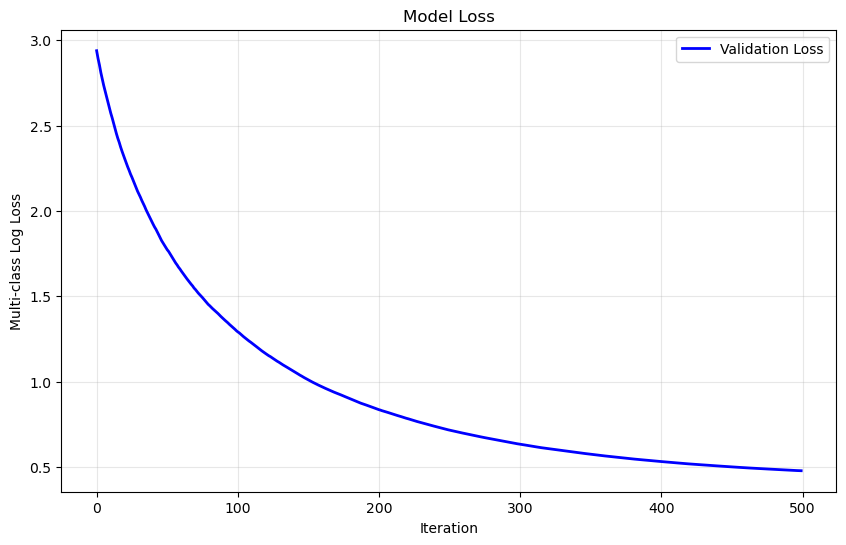

In [80]:
results = model.evals_result()

plt.figure(figsize=(10, 6))
iterations = range(len(results['validation_0']['mlogloss']))
plt.plot(iterations, results['validation_0']['mlogloss'], 'b-', label='Validation Loss', linewidth=2)
plt.title('Model Loss')
plt.xlabel('Iteration')
plt.ylabel('Multi-class Log Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 0.9],
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    enable_categorical=True,
    tree_method='hist',
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = RandomizedSearchCV(xgb_model,
                                 param_grid,
                                 cv=cv,
                                 scoring="accuracy",
                                 n_iter=20,
                                 verbose=2,
                                 random_state=42)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# mejores parametros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy: ", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  12.9s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  13.4s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  13.2s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=   9.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=   9.1s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=   9.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  19.2s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  19.0s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  19.5s
[CV] END colsample_bytree=0.7, learn

In [82]:
y_pred = best_xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)
# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)
# Recall score
recall = recall_score(y_test, y_pred, average='weighted')   
print("Recall Score: ", recall)

Test accuracy:  0.818705035971223
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98        59
           1       0.59      0.47      0.53        55
           2       0.60      0.78      0.68       138
           3       0.77      0.50      0.61        88
           4       0.98      1.00      0.99        63
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        45
           8       0.98      1.00      0.99        42
           9       0.80      0.82      0.81        40
          10       0.73      0.73      0.73        82
          11       0.80      0.79      0.79        95
          12       0.72      0.67      0.69        63
          13       0.86      0.89      0.87       143
          14       1.00      1.00      1.00        36
          15       0.67      0.72      0.69        57
          16       0.88

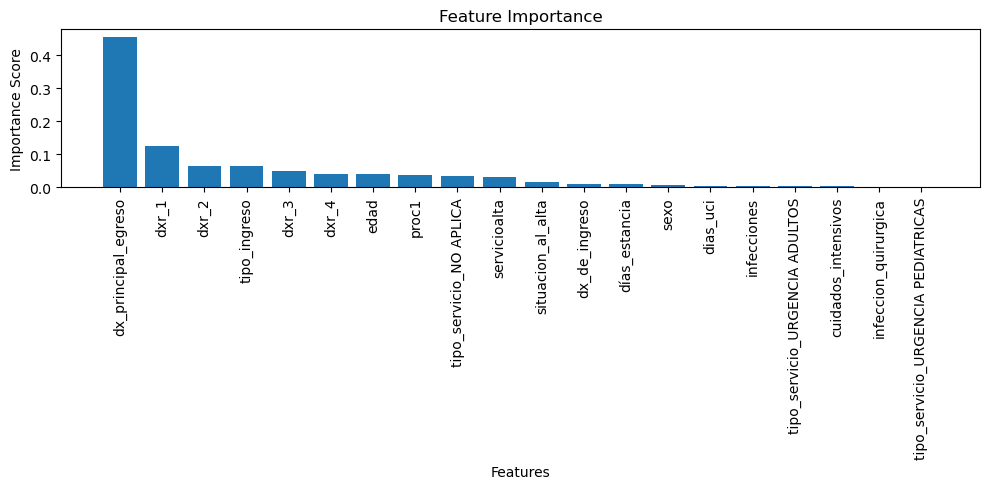

In [83]:
features_importance = best_xgb.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(features_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(features_importance)), features_importance[sorted_indices], align='center')
plt.xticks(range(len(features_importance)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()

# OTRO ENTRENAMIENTO

In [3]:
df = pd.read_csv('../data/data_cleaned.csv')
df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,14143,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,184153,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,184153,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,184153,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,184112,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,23,0,0,2,297,0,0,2,J01,R509,...,MISSING,MISSING,1.0,MISSING,0,0,34131,0,1,0
27863,64,1,0,1,42,1,1,2,I74,K658,...,R100,MISSING,0.0,38.08,0,0,61203,0,0,0
27864,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,MISSING,1.0,21.82,0,0,31202,1,0,0
27865,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,91301,0,1,0


In [5]:
counts = df['grd_codigo'].value_counts()
rare_codes = counts[counts < 150].index

# Rellena esos códigos como 'OTRO'
df['grd_codigo'] = df['grd_codigo'].apply(lambda x: 'OTRO' if x in rare_codes else x)

# Verifica el resultado
df['grd_codigo'].value_counts()

grd_codigo
OTRO      17192
44173       732
114122      691
54123       631
44163       577
114123      433
14221       363
44162       354
114102      291
114131      286
174133      285
44172       264
81801       258
54122       252
114121      246
14263       242
54152       223
54153       208
44153       205
44181       203
44161       203
64181       199
174132      198
114103      192
104102      187
81701       183
64171       178
14222       177
71141       172
44171       172
51153       169
64172       167
81601       164
81201       162
64182       160
14262       159
74113       159
54193       158
61131       158
14231       157
74103       157
64183       150
214123      150
Name: count, dtype: int64

In [6]:
df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,29,0,0,2,I63,I652,...,C787,C788,1.0,43.11,0,0,OTRO,0,1,0
1,27,1,0,30,156,0,0,2,B23,B210,...,B162,A530,1.0,87.44,0,0,OTRO,1,0,0
2,39,1,0,21,39,0,0,2,B22,B451,...,B588,D70,1.0,38.93,0,0,OTRO,0,1,0
3,24,1,0,2,20,0,0,2,B20,B200,...,A600,N518,1.0,88.01,0,0,OTRO,0,1,0
4,60,1,0,44,24,0,0,2,T81,Y838,...,N390,B961,1.0,45.16,0,0,OTRO,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,23,0,0,2,297,0,0,2,J01,R509,...,MISSING,MISSING,1.0,MISSING,0,0,OTRO,0,1,0
27863,64,1,0,1,42,1,1,2,I74,K658,...,R100,MISSING,0.0,38.08,0,0,OTRO,0,0,0
27864,8,0,0,1,28,0,0,2,S00,V8009,...,S0250,MISSING,1.0,21.82,0,0,OTRO,1,0,0
27865,21,1,0,1,24,0,0,2,S68,X9988,...,S6270,S661,1.0,77.04,0,0,OTRO,0,1,0


In [7]:
dxr_columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']

for col in dxr_columns:
  if col in df.columns:
    if df[col].dtype == 'object':
      df[col] = df[col].str[:3]

df[['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4']]

,dxr_1,dxr_2,dxr_3,dxr_4
0,I65,C18,C78,C78
1,B21,B20,B16,A53
2,B45,G05,B58,D70
3,B20,B21,A60,N51
4,Y83,C14,N39,B96
...,...,...,...,...
27862,R50,MIS,MIS,MIS
27863,K65,K26,R10,MIS
27864,V80,S02,S02,MIS
27865,X99,S62,S62,S66


In [8]:
df['servicioalta'] = 'X' + df['servicioalta'].astype(str)
df['dx_de_ingreso'] = 'X' + df['dx_de_ingreso'].astype(str)
df['proc1'] = 'X' + df['proc1'].astype(str)
df['grd_codigo'] = 'X' + df['grd_codigo'].astype(str)

df

,edad,sexo,tipo_ingreso,días_estancia,servicioalta,cuidados_intensivos,dias_uci,dx_de_ingreso,dx_principal_egreso,dxr_1,...,dxr_3,dxr_4,situacion_al_alta,proc1,infecciones,infeccion_quirurgica,grd_codigo,tipo_servicio_NO APLICA,tipo_servicio_URGENCIA ADULTOS,tipo_servicio_URGENCIA PEDIATRICAS
0,38,0,0,20,X29,0,0,X2,I63,I65,...,C78,C78,1.0,X43.11,0,0,XOTRO,0,1,0
1,27,1,0,30,X156,0,0,X2,B23,B21,...,B16,A53,1.0,X87.44,0,0,XOTRO,1,0,0
2,39,1,0,21,X39,0,0,X2,B22,B45,...,B58,D70,1.0,X38.93,0,0,XOTRO,0,1,0
3,24,1,0,2,X20,0,0,X2,B20,B20,...,A60,N51,1.0,X88.01,0,0,XOTRO,0,1,0
4,60,1,0,44,X24,0,0,X2,T81,Y83,...,N39,B96,1.0,X45.16,0,0,XOTRO,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27862,23,0,0,2,X297,0,0,X2,J01,R50,...,MIS,MIS,1.0,XMISSING,0,0,XOTRO,0,1,0
27863,64,1,0,1,X42,1,1,X2,I74,K65,...,R10,MIS,0.0,X38.08,0,0,XOTRO,0,0,0
27864,8,0,0,1,X28,0,0,X2,S00,V80,...,S02,MIS,1.0,X21.82,0,0,XOTRO,1,0,0
27865,21,1,0,1,X24,0,0,X2,S68,X99,...,S62,S66,1.0,X77.04,0,0,XOTRO,0,1,0


In [9]:
columns = ['dxr_1', 'dxr_2', 'dxr_3', 'dxr_4', 'grd_codigo', 'proc1', 'dx_principal_egreso', 'dx_de_ingreso', 'servicioalta']
for col in columns:
    df[col] = df[col].astype("category")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27867 entries, 0 to 27866
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   edad                                27867 non-null  int64   
 1   sexo                                27867 non-null  int64   
 2   tipo_ingreso                        27867 non-null  int64   
 3   días_estancia                       27867 non-null  int64   
 4   servicioalta                        27867 non-null  category
 5   cuidados_intensivos                 27867 non-null  int64   
 6   dias_uci                            27867 non-null  int64   
 7   dx_de_ingreso                       27867 non-null  category
 8   dx_principal_egreso                 27867 non-null  category
 9   dxr_1                               27867 non-null  category
 10  dxr_2                               27867 non-null  category
 11  dxr_3                       

In [12]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [10]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns='grd_codigo')
y = df['grd_codigo']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)

In [14]:
n_clases = len(np.unique(y_encoded))
print(f"Total de clases: {n_clases}")
print('Train sample: ' , (X_train.shape , y_train.shape))
print('Test sample: ' , (X_test.shape , y_test.shape))

Total de clases: 43
Train sample:  ((22293, 20), (22293,))
Test sample:  ((5574, 20), (5574,))


In [31]:
params = {
    'booster': 'gbtree', # Usar gradient boosting trees
    'eta': 0.05, # Tasa de aprendizaje
    'max_depth': 5, # Máxima profundidad del árbol
    'colsample_bytree': 0.6, # Porcentaje de muestreo de las columnas
    'objective': 'multi:softprob', # Clasificador multiclase
    'n_estimators': 300, # Número de árboles
    'random_state': 42, # Semilla del generador de números aleatorios
    'enable_categorical':True, # Para que el modelo procese variables categóricas
}

model = xgb.XGBClassifier(**params)

model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

print('Train accuracy: ', model.score(X_train, y_train))
print('Test accuracy: ', model.score(X_test, y_test))

[0]	validation_0-mlogloss:3.18835
[1]	validation_0-mlogloss:2.85457
[1]	validation_0-mlogloss:2.85457
[2]	validation_0-mlogloss:2.62848
[2]	validation_0-mlogloss:2.62848
[3]	validation_0-mlogloss:2.45234
[3]	validation_0-mlogloss:2.45234
[4]	validation_0-mlogloss:2.30300
[4]	validation_0-mlogloss:2.30300
[5]	validation_0-mlogloss:2.18066
[5]	validation_0-mlogloss:2.18066
[6]	validation_0-mlogloss:2.06341
[6]	validation_0-mlogloss:2.06341
[7]	validation_0-mlogloss:1.97237
[7]	validation_0-mlogloss:1.97237
[8]	validation_0-mlogloss:1.88741
[8]	validation_0-mlogloss:1.88741
[9]	validation_0-mlogloss:1.80824
[9]	validation_0-mlogloss:1.80824
[10]	validation_0-mlogloss:1.74068
[10]	validation_0-mlogloss:1.74068
[11]	validation_0-mlogloss:1.67518
[11]	validation_0-mlogloss:1.67518
[12]	validation_0-mlogloss:1.61319
[12]	validation_0-mlogloss:1.61319
[13]	validation_0-mlogloss:1.55618
[13]	validation_0-mlogloss:1.55618
[14]	validation_0-mlogloss:1.50407
[14]	validation_0-mlogloss:1.50407
[15]

In [140]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

param_grid = {
    'n_estimators': [500, 600, 700],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.7, 0.9],
}

xgb_model = xgb.XGBClassifier(
    random_state=42,
    enable_categorical=True,
    tree_method='hist',
)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_search = RandomizedSearchCV(xgb_model,
                                 param_grid,
                                 cv=cv,
                                 scoring="accuracy",
                                 n_iter=20,
                                 verbose=2,
                                 random_state=42)

grid_search.fit(X_train, y_train)

best_xgb = grid_search.best_estimator_

# mejores parametros
print("Mejores parámetros:", grid_search.best_params_)
print("Mejor accuracy: ", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  23.2s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  22.8s
[CV] END colsample_bytree=0.7, learning_rate=0.1, max_depth=5, n_estimators=500; total time=  25.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=  14.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=  14.4s
[CV] END colsample_bytree=0.5, learning_rate=0.1, max_depth=3, n_estimators=500; total time=  14.4s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  29.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  30.1s
[CV] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  29.2s
[CV] END colsample_bytree=0.7, learn

In [141]:
y_pred = best_xgb.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy: ", test_accuracy)
# classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
# F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score: ", f1)
# Recall score
recall = recall_score(y_test, y_pred, average='weighted')   
print("Recall Score: ", recall)

Test accuracy:  0.907427341227126
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.52      0.56        54
           1       0.66      0.50      0.57        46
           2       0.71      0.87      0.78       154
           3       0.79      0.59      0.68        83
           4       0.87      0.82      0.84        55
           5       0.92      0.71      0.80        69
           6       0.76      0.55      0.64        47
           7       0.95      0.87      0.91        61
           8       0.62      0.41      0.49        44
           9       0.77      0.86      0.81        35
          10       0.75      0.68      0.71        77
          11       0.82      0.86      0.84        95
          12       0.71      0.65      0.68        62
          13       0.84      0.88      0.86       154
          14       0.93      0.93      0.93        43
          15       0.59      0.73      0.65        48
          16       0.80

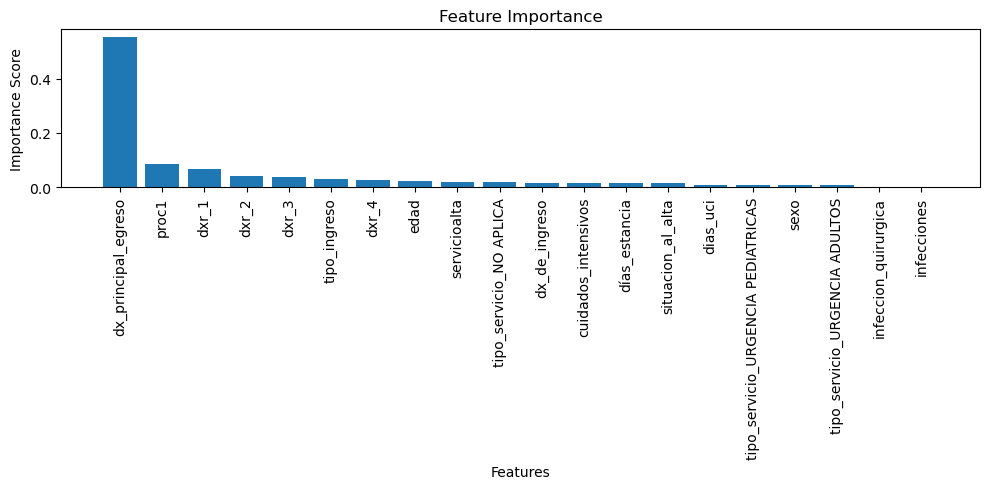

In [142]:
features_importance = best_xgb.feature_importances_
feature_names = X_train.columns

sorted_indices = np.argsort(features_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(features_importance)), features_importance[sorted_indices], align='center')
plt.xticks(range(len(features_importance)), np.array(feature_names)[sorted_indices], rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()

In [143]:
import joblib

joblib.dump(best_xgb, 'best_model.pkl')

['best_model.pkl']

In [15]:
import joblib
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score

# Cargar el modelo guardado
loaded_model = joblib.load('best_model.pkl')

# Realizar predicciones con los datos de test
y_pred_loaded = loaded_model.predict(X_test)

# Evaluar el modelo cargado

print("Test accuracy:", accuracy_score(y_test, y_pred_loaded))
print("Classification Report:\n", classification_report(y_test, y_pred_loaded))
print("F1 Score:", f1_score(y_test, y_pred_loaded, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_loaded, average='weighted'))

Test accuracy: 0.8498385360602799
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.34      0.46        35
           1       0.60      0.72      0.66        54
           2       0.73      0.42      0.53        38
           3       0.69      0.48      0.56        46
           4       0.69      0.86      0.77       154
           5       0.77      0.58      0.66        83
           6       0.87      0.82      0.84        55
           7       0.83      0.86      0.84        69
           8       0.61      0.67      0.63        30
           9       0.80      0.75      0.77        32
          10       0.54      0.50      0.52        28
          11       0.76      0.68      0.72        47
          12       0.87      0.87      0.87        52
          13       0.87      0.90      0.89        61
          14       0.69      0.46      0.55        39
          15       0.73      0.36      0.48        44
          16       0.81